In [1]:
from scipy import ndimage, misc
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from PIL import Image
%matplotlib inline

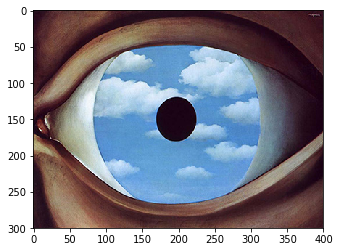

In [2]:
from skimage.color import rgb2gray

img = misc.imread('falsemirror.jpg')
plt.imshow(img)

x = len(img[0])
y = len(img)
pixel_num = x * y

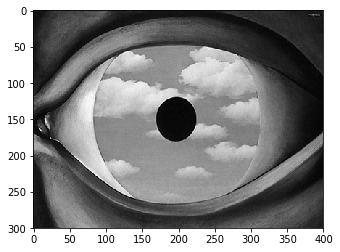

In [3]:
img_gray = rgb2gray(img)

plt.imshow(rgb2gray(img), cmap = 'gray')

img_gray.shape

plt.savefig('graypainting.png')

In [4]:
def sample_pixels(x, y):

    random_pixels = []

    while len(random_pixels) < 5000:
        x_random = np.random.randint(0, x)
        y_random = np.random.randint(0, y)

        temp = [x_random, y_random]

        if temp not in random_pixels:
            random_pixels.append(temp)
    
    return random_pixels

In [5]:
from sklearn.preprocessing import normalize

def preprocess_image(img):
    img = normalize(img)
    return img

In [6]:
#prp_image = preprocess_image(img)
# Gives dimension error

In [7]:
X = sample_pixels(x, y)

In [8]:
def return_value(pixel, img):
    
    x_coordinate = pixel[0]
    y_coordinate = pixel[1]
    
    return img[y_coordinate][x_coordinate]

In [9]:
def create_y(samples, img):
    y = []
    for pixel in samples:
        rgb = return_value(pixel, img)
        y.append(rgb)
    
    return y

In [10]:
Y = create_y(X, img_gray)

In [11]:
## Too much runtime

def approximate_image(regr, x, y):
    app_image = []
    
    for i in range(y): ## supposed to be y
        line = []
        for j in range(x): ## supposed to be x
            line.append(regr.predict([[j,i]]))
        app_image.append(line)
        
    return app_image

In [21]:
## Mona Lisa: depth of 5 is not enough, 10 is still coarse, 15 is better than the previous ones
## For the city artery art: 40 doesn't do a great job
## For Vasarely, even 70 does not do a great job

from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

depths = [1, 2, 3, 5, 10, 15]
estimators = [1, 3, 5, 10, 100, 200]
alphas = [10 ** (-7), 10 ** (-6), 10 ** (-5), 10 ** (-4), 10 ** (-3), 10 ** (-1)]
experiment_1 = []
experiment_2 = []
experiment_3 = []

for depth in depths:
    experiment_1.append(RandomForestRegressor(max_depth=depth, random_state=0, n_estimators=1).fit(X, Y))
    
for estimator in estimators:
    experiment_2.append(RandomForestRegressor(max_depth=7, random_state=0, n_estimators=estimator).fit(X, Y))
    
for alpha in alphas:
    experiment_3.append(RandomForestRegressor(max_depth=15, random_state=0, n_estimators=1, min_impurity_split = alpha).fit(X, Y))

/Users/noel/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/noel/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/noel/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/noel/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


In [13]:
# A function to create the final approximated image
# x: the numbe of pixels along the y axis
# y: the numbe of pixels along the y axis
# regr: the regression model used to predict the image pixel values

def approximate_image(x, y, regr):
    
    X = []

    for i in range(y):
        line = []
        for j in range(x):
            line.append([j,i])
        X.append(line)
        
    X = np.array(X)
    
    final_image = []

    for i in range(len(X)):
        temp = regr.predict(X[i])
        temp = temp.reshape(1, x)
        final_image.append(temp)
    
    return final_image

In [14]:
results_1 = []
results_2 = []
results_3 = []

for exp1 in experiment_1:
    results_1.append(approximate_image(x, y, exp1))

for exp2 in experiment_2:
    results_2.append(approximate_image(x, y, exp2))
    
for exp3 in experiment_3:
    results_3.append(approximate_image(x, y, exp3))

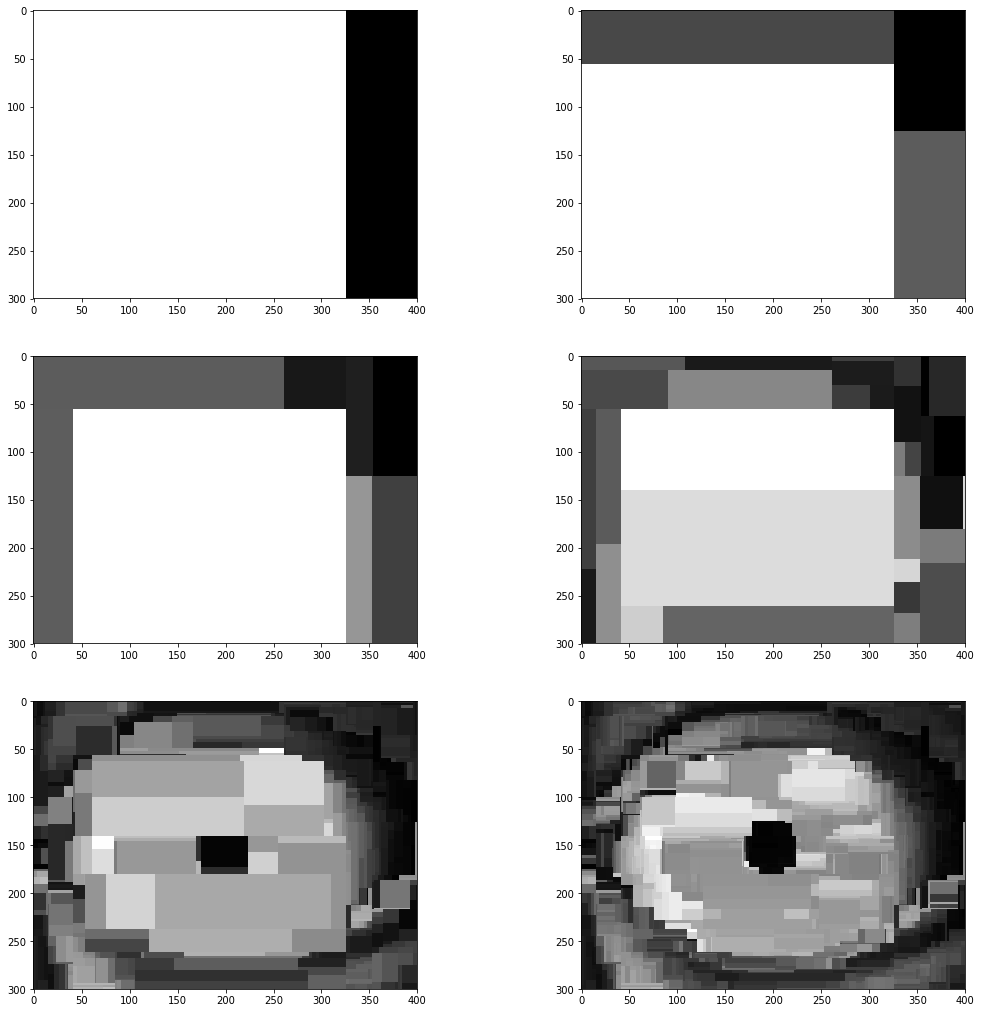

In [15]:
fig=plt.figure(figsize=(18, 18))
columns = 2
rows = 3
for i in range(1, columns*rows +1):
    img = np.array(results_1[i-1]).reshape((y, x))
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap = 'gray')
plt.show()

fig.savefig('experiment1.png')

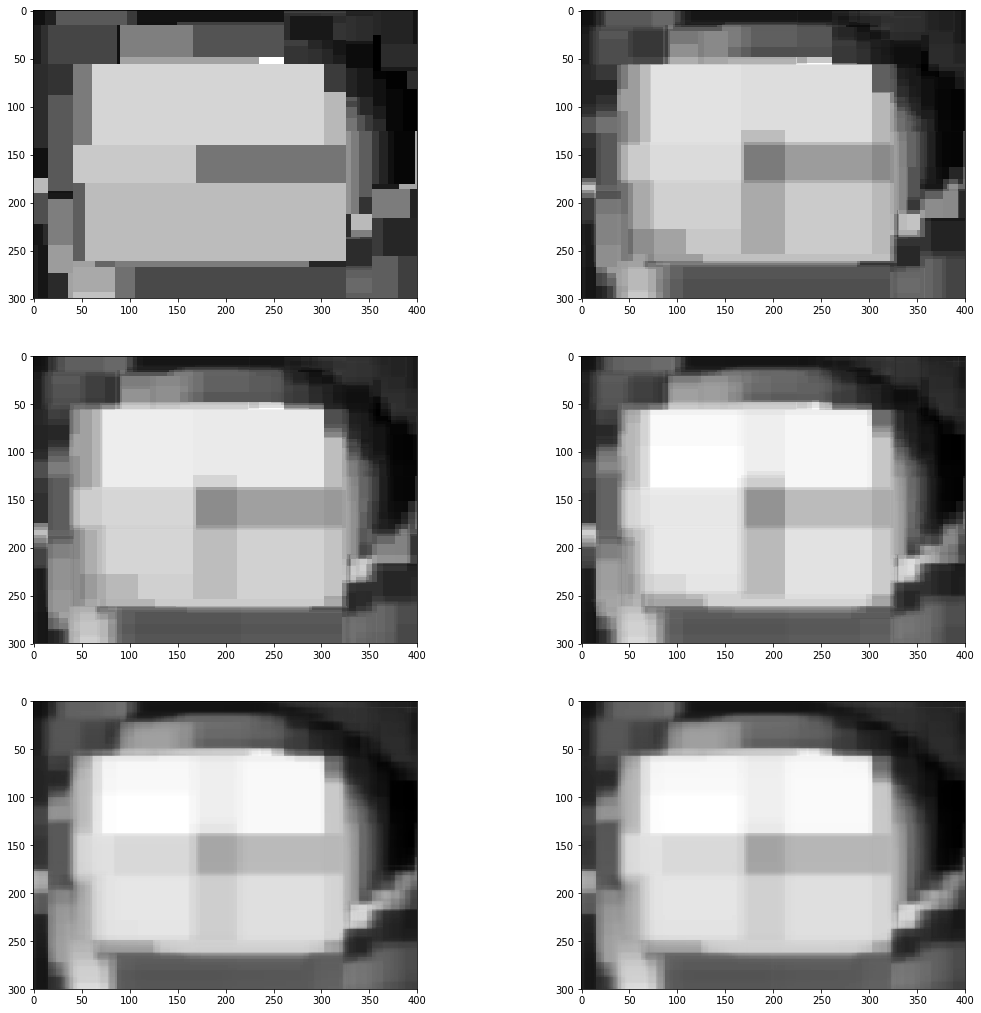

In [16]:
fig=plt.figure(figsize=(18, 18))
columns = 2
rows = 3
for i in range(1, columns*rows +1):
    img = np.array(results_2[i-1]).reshape((y, x))
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap = 'gray')
plt.show()

fig.savefig('experiment2.png')

In [17]:
from sklearn.neighbors import KNeighborsRegressor as KNN

knn = KNN(n_neighbors = 1)
knn.fit(X,Y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=1, p=2,
          weights='uniform')

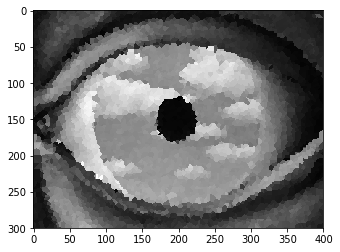

In [18]:
knn_img = approximate_image(x, y, knn)
plt.imshow(np.array(knn_img).reshape((y, x)), cmap = 'gray')
plt.savefig('1nn.png')

Estimate α by 5- or 10-fold cross validation, i.e., choose αˆ to minimize the cross-validated sum of squares. The final tree is Tαˆ. Now we’ve seen how to do regression using a binary tree. How do we use trees for classification?

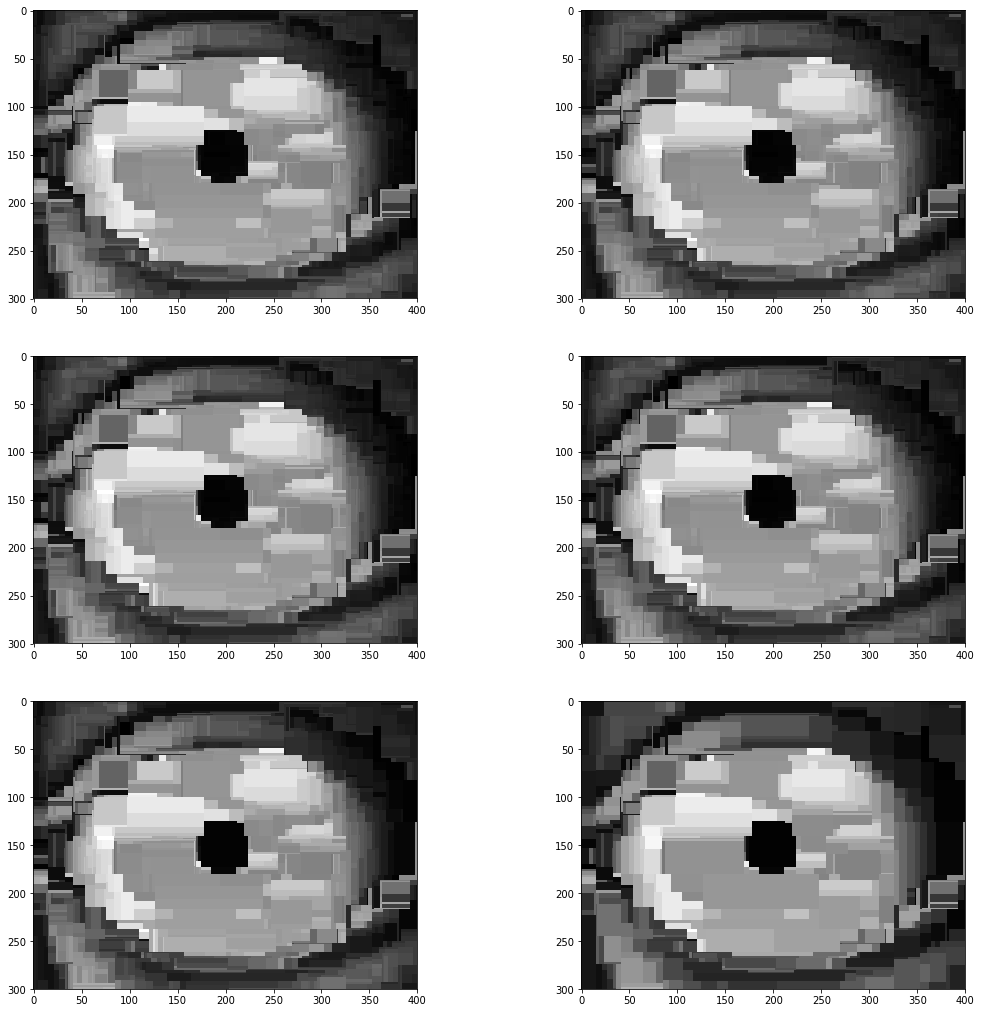

In [22]:
fig=plt.figure(figsize=(18, 18))
columns = 2
rows = 3
for i in range(1, columns*rows +1):
    img = np.array(results_3[i-1]).reshape((y, x))
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap = 'gray')
plt.show()

fig.savefig('experiment3.png')

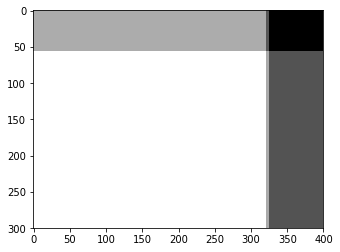

In [20]:
img = np.array(approximate_image(x, y, RandomForestRegressor(max_depth=1, random_state=0, n_estimators=3).fit(X, Y))).reshape((y, x))
plt.imshow(img, cmap = 'gray')